### Columns in uciData: AT, V, AP, RH, PE

##### AT: Temperature in range 1.81-37.11 deg C
##### V : Exhaust Vacuum in range: 25.58% to 100.16%
##### AP: Ambient pressure in the range 992.89-1033.30 milibar
##### RH: Relative Humidity in range 25.36-81.56 cm Hg
##### PE: Net hourly electrical energy output : 420.26-495.76 MW

In [54]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt

In [41]:
data = pd.read_csv("uciData.csv")

In [42]:
data.head() # display top 5 rows of dataset

,AT,V,AP,RH,PE
0,14.96,41.76,1024.07,73.17,463.26
1,25.18,62.96,1020.04,59.08,444.37
2,5.11,39.40,1012.16,92.14,488.56
3,20.86,57.32,1010.24,76.64,446.48
4,10.82,37.50,1009.23,96.62,473.90


##### Define X = independent variables data, y = dependent variables data

In [43]:
x = data.drop(['PE'],axis=1).values  # independent variables values
y = data['PE'].values  # dependent variable

##### Split dataset into training and test set

###### x_train = input values used to train, y_train = true output value of the input features used to train
###### x_test = input features used to test prediction, y_test = actual output values used to test error with predicted value

In [44]:
# we are diving the dataset into training and testing set.
# test_size = 0.3
#  training set gets 70% and testig set gets 30% of the data.
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3, random_state=0) 

#### Training the model on training set

In [45]:
reg = LinearRegression()
reg.fit(x_train, y_train)

LinearRegression()

##### Predict the Test Set results

In [46]:
y_pred = reg.predict(x_test)
y_pred

array([431.40245096, 458.61474119, 462.81967423, ..., 432.47380825,
       436.16417243, 439.00714594])

In [47]:
reg.predict([[14.96, 41.76, 1024.07, 73.17]])

array([467.34820092])

##### Evaluate the Model

In [49]:
# Using r2_score we can see the accuracy of our model -
# by comparing the true output value = y_test and predicted values = y_pred
accuracy = r2_score(y_test, y_pred)
accuracy = round(accuracy * 100, 3)

In [51]:
print(f"Accuracy: {accuracy}%")

Accuracy: 93.041%


##### Plot predicted results

Text(0.5, 1.0, 'Actual vs Predicted')

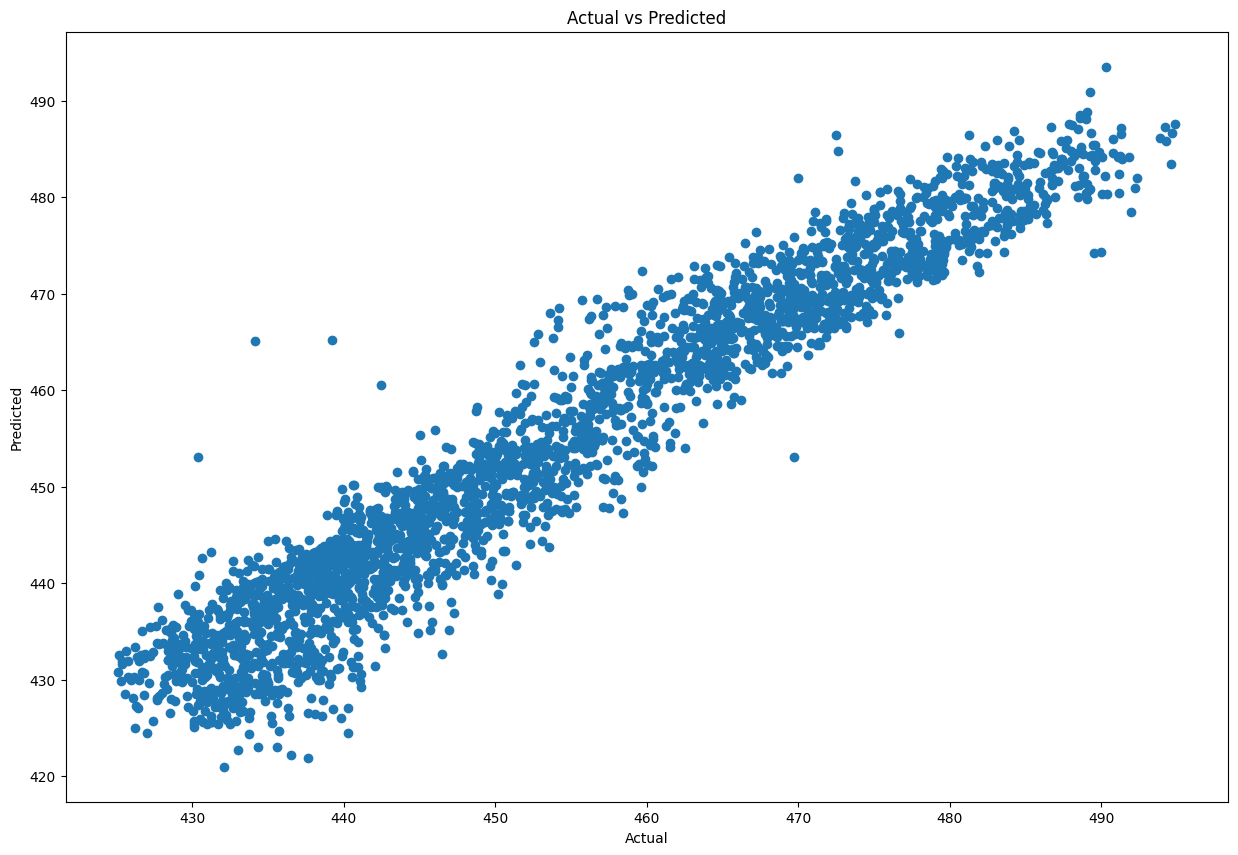

In [56]:
plt.figure(figsize=(15, 10))
plt.scatter(y_test, y_pred)
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Actual vs Predicted")

##### Store the actual vs predicted value

In [57]:
pred_y = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred, 'Difference': y_test - y_pred })

In [59]:
pred_y.head()

,Actual,Predicted,Difference
0,431.23,431.402451,-0.172451
1,460.01,458.614741,1.395259
2,461.14,462.819674,-1.679674
3,445.90,448.601237,-2.701237
4,451.29,457.879479,-6.589479
